In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('d:\weather.csv')

In [3]:
# Check the data types of the variables
print(df.dtypes)

year          int64
meantemp    float64
mintemp     float64
maxtemp     float64
humidity    float64
dtype: object


In [4]:
df['mintemp']=df['mintemp'].astype('int')

In [5]:
df['maxtemp']=df['maxtemp'].astype('int')

In [6]:
df['meantemp']=df['meantemp'].astype('int')

In [7]:
df['humidity']=df['humidity'].astype('int')

In [8]:
 #Check the data types of the variables
print(df.dtypes)

year        int64
meantemp    int32
mintemp     int32
maxtemp     int32
humidity    int32
dtype: object


In [9]:
# Convert date column to datetime format
df['year'] = pd.to_datetime(df['year'])

In [10]:
# Set date column as index
df.set_index('year', inplace=True)

In [11]:
#Check the data types of the variables
print(df.dtypes)

meantemp    int32
mintemp     int32
maxtemp     int32
humidity    int32
dtype: object


In [12]:
# Check the first few rows of the dataset
print(df.head())

                               meantemp  mintemp  maxtemp  humidity
year                                                               
1970-01-01 00:00:00.000001970        22       18       28      2567
1970-01-01 00:00:00.000001971        22       17       27      2548
1970-01-01 00:00:00.000001972        22       18       28      2280
1970-01-01 00:00:00.000001973        22       18       28      2598
1970-01-01 00:00:00.000001974        22       18       27      2684


In [13]:
# Check for missing values
print(df.isna().sum())

meantemp    0
mintemp     0
maxtemp     0
humidity    0
dtype: int64


In [14]:
# Descriptive statistics of the variables
print(df.describe())

        meantemp    mintemp   maxtemp     humidity
count  50.000000  50.000000  50.00000    50.000000
mean   22.700000  18.480000  28.08000  2374.900000
std     0.543984   0.543609   0.60068   156.581237
min    22.000000  17.000000  27.00000  2021.000000
25%    22.000000  18.000000  28.00000  2268.750000
50%    23.000000  18.500000  28.00000  2349.000000
75%    23.000000  19.000000  28.00000  2506.750000
max    24.000000  19.000000  29.00000  2684.000000


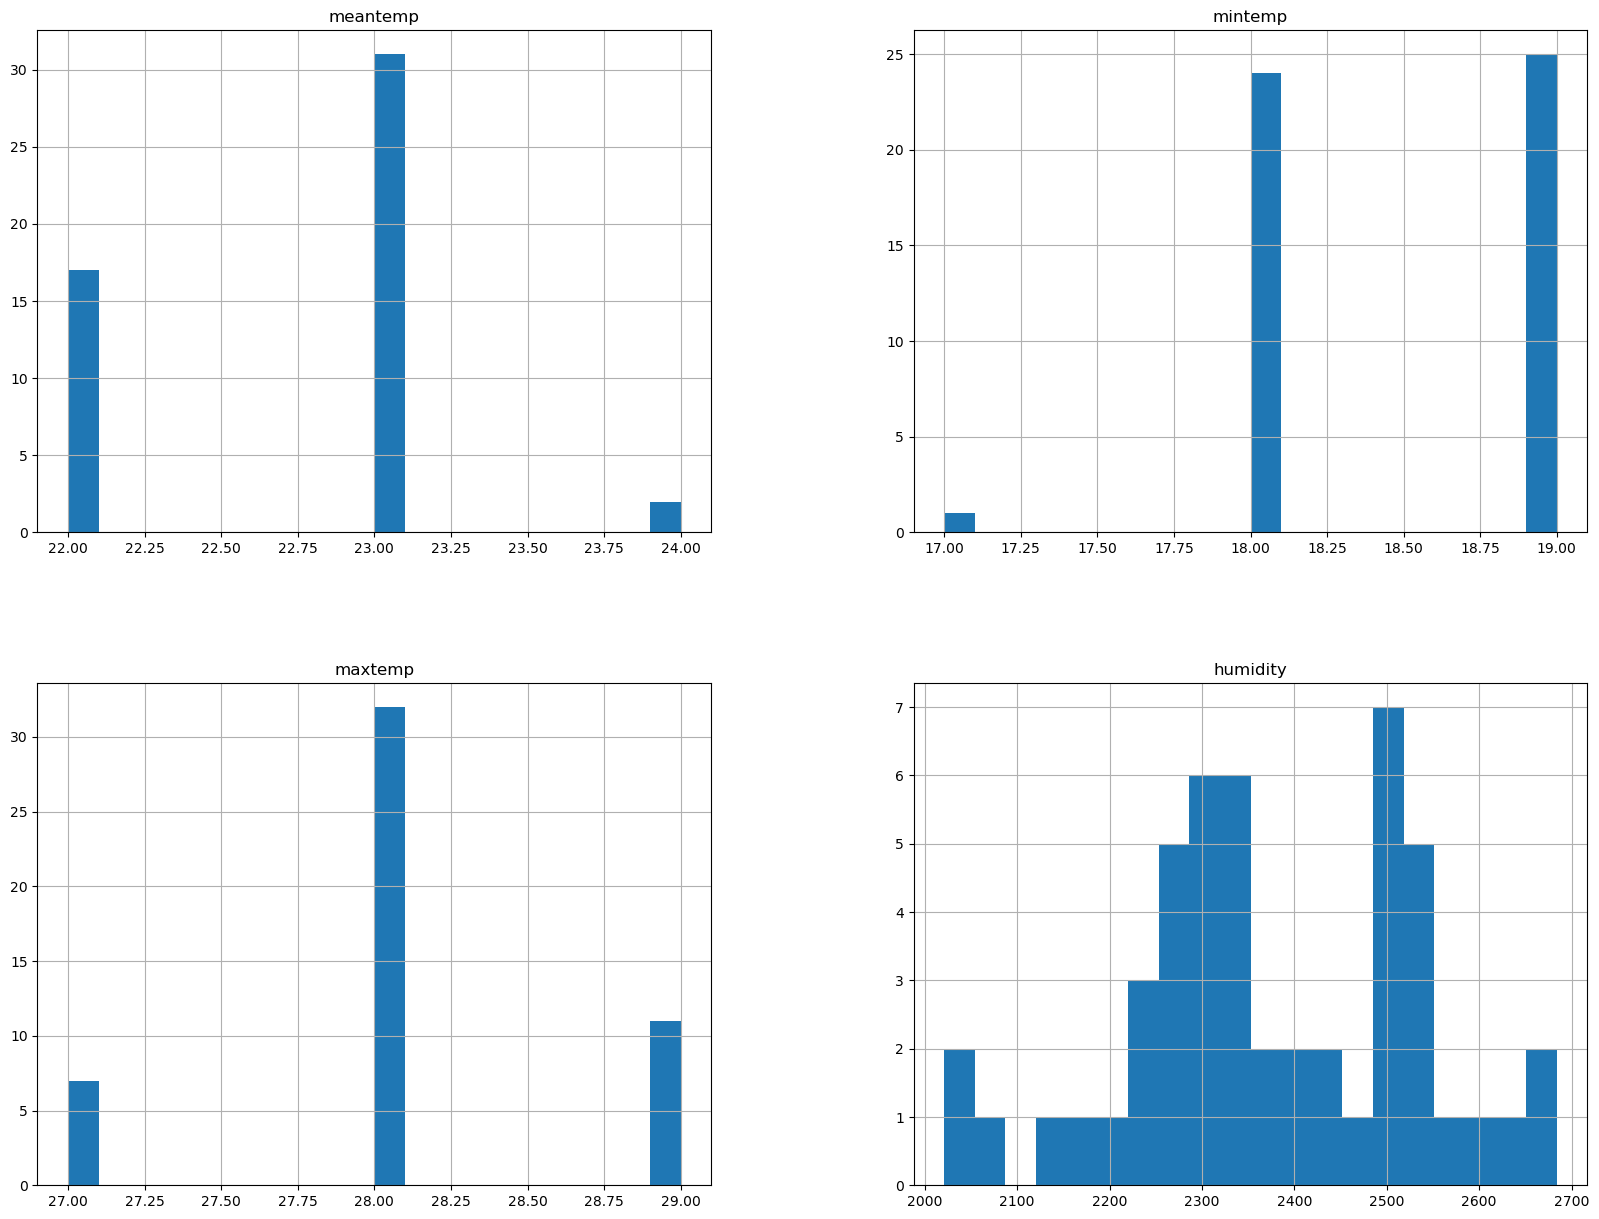

In [15]:
# Visualize the distribution of variables using histograms
df.hist(bins=20, figsize=(20,15))
plt.show()

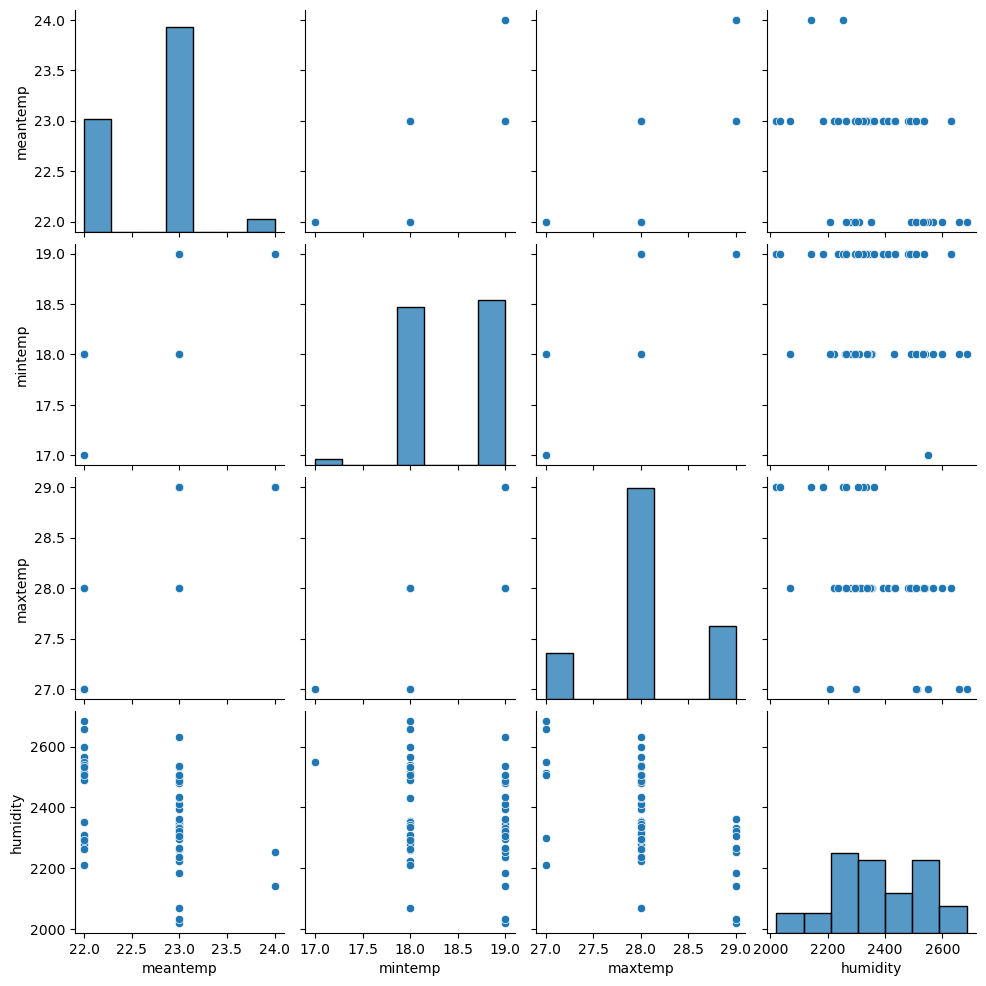

In [16]:
# Visualize the relationship between variables using scatter plots
sns.pairplot(df)
plt.show()

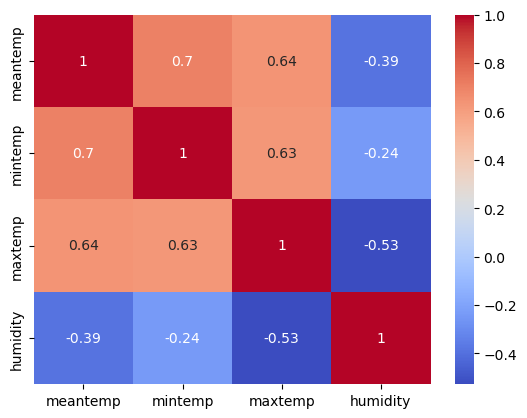

In [17]:
# Visualize the correlation between variables using heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True)
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [19]:
# Select the relevant columns for the MLP model
df = df[['meantemp', 'mintemp', 'maxtemp', 'humidity']]

In [20]:
# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Split the train and test data into X (input features) and y (output variable)
X_train = train_scaled[:, :-1]
y_train = train_scaled[:, -1]
X_test = test_scaled[:, :-1]
y_test = test_scaled[:, -1]

Epoch 1/100
3/3 [==============================] - 2s 243ms/step - loss: 2.0919 - mae: 1.1626 - val_loss: 1.8869 - val_mae: 1.0419
Epoch 2/100
3/3 [==============================] - 0s 49ms/step - loss: 2.0580 - mae: 1.1554 - val_loss: 1.8410 - val_mae: 1.0298
Epoch 3/100
3/3 [==============================] - 0s 41ms/step - loss: 2.0254 - mae: 1.1484 - val_loss: 1.7971 - val_mae: 1.0173
Epoch 4/100
3/3 [==============================] - 0s 50ms/step - loss: 1.9977 - mae: 1.1427 - val_loss: 1.7581 - val_mae: 1.0053
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 1.9623 - mae: 1.1349 - val_loss: 1.7228 - val_mae: 0.9946
Epoch 6/100
3/3 [==============================] - 0s 45ms/step - loss: 1.9352 - mae: 1.1281 - val_loss: 1.6881 - val_mae: 0.9840
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 1.9048 - mae: 1.1215 - val_loss: 1.6568 - val_mae: 0.9803
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 1.8823 - mae: 1.1

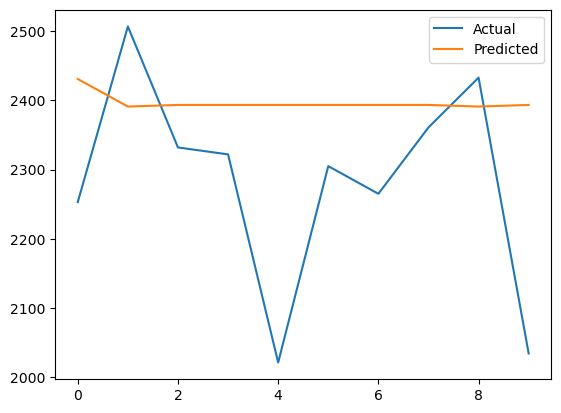

In [21]:
# Define the MLP model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model on the train data
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test data
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {mse:.3f}, Test MAE: {mae:.3f}')

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled data to get the actual values
y_test_actual = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test, y_pred), axis=1))[:, -1]

# Plot the actual and predicted values
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.legend()
plt.show()

In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [23]:
# Combine the variables into one input matrix
X = np.column_stack(('mintemp', 'maxtemp', 'meantemp', 'humidity'))

In [24]:
# convert data type to float
df['mintemp'] = df['mintemp'].astype(float)
df['maxtemp'] = df['maxtemp'].astype(float)
df['meantemp'] = df['meantemp'].astype(float)
df['humidity'] = df['humidity'].astype(float)

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
# Select the four weather variables
data= df[['mintemp', 'maxtemp', 'humidity','meantemp']]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Scale the data
             
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the training and testing sets
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

1/1 [==============================] - 0s 128ms/step
Root Mean Squared Error (RMSE):  0.18511037594330268


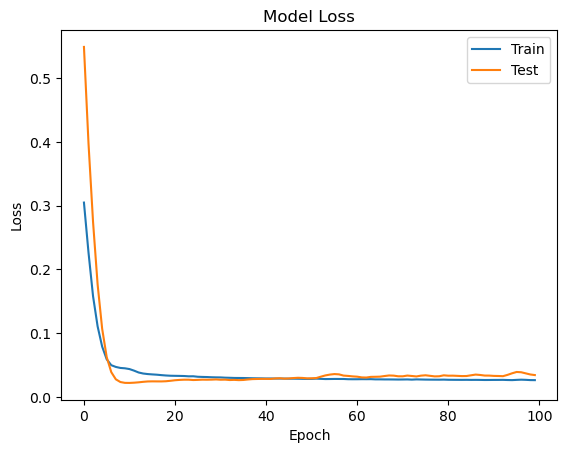

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model using the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# Plot the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['mintemp', 'maxtemp', 'meantemp']], df['humidity'], test_size=0.2)

# Scale the data using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Split the dataset into input features and output variable
X = data[['meantemp', 'mintemp', 'maxtemp']]
y = data[['humidity']]

In [33]:
# Normalize the input features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='linear'))

# Compile the ANN model
ann_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the ANN model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
ann_history = ann_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stop])

# Evaluate the ANN model on the testing set
ann_loss = ann_model.evaluate(X_test, y_test, verbose=0)
print('ANN Model Loss: ', ann_loss)

# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

# Compile the MLP model
mlp_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the MLP model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stop])

# Evaluate the MLP model on the testing set
mlp_loss = mlp_model.evaluate(X_test, y_test, verbose=0)
print('MLP Model Loss: ', mlp_loss)

Epoch 1/100
2/2 [==============================] - 2s 237ms/step - loss: 5674758.0000 - val_loss: 5597098.0000
Epoch 2/100
2/2 [==============================] - 0s 50ms/step - loss: 5674604.0000 - val_loss: 5596928.5000
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 5674457.0000 - val_loss: 5596768.0000
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 5674317.5000 - val_loss: 5596610.0000
Epoch 5/100
2/2 [==============================] - 0s 57ms/step - loss: 5674179.0000 - val_loss: 5596452.5000
Epoch 6/100
2/2 [==============================] - 0s 59ms/step - loss: 5674035.0000 - val_loss: 5596301.0000
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 5673904.0000 - val_loss: 5596149.5000
Epoch 8/100
2/2 [==============================] - 0s 58ms/step - loss: 5673769.0000 - val_loss: 5595998.5000
Epoch 9/100
2/2 [==============================] - 0s 56ms/step - loss: 5673633.0000 - val_loss: 5595847.0000
Epoch 10/

In [34]:
# Load necessary libraries
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate MLP model
y_pred_mlp = mlp_model.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)

# Evaluate ANN model
y_pred_ann = ann_model.predict(X_test)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
mape_ann = mean_absolute_percentage_error(y_test, y_pred_ann)

# Print the evaluation results
print("MLP Model:")
print("MAE:", mae_mlp)
print("RMSE:", rmse_mlp)
print("MAPE:", mape_mlp)

print("\nANN Model:")
print("MAE:", mae_ann)
print("RMSE:", rmse_ann)
print("MAPE:", mape_ann)

1/1 [==============================] - 0s 89ms/step
MLP Model:
MAE: 2376.7598613262176
RMSE: 2378.2145239747324
MAPE: humidity    99.711722
dtype: float64

ANN Model:
MAE: 2379.9773832798005
RMSE: 2381.4162642335564
MAPE: humidity    99.847436
dtype: float64


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
